# 1. Introduction

### Target: 

Predict the price of unit area for houses given their features.<br>
#### Attributes:
- X1 transaction date
- X2 house age
- X3 distance to the nearest MRT station
- X4 number of convenience stores
- X5 latitude 
- X6 longitude
- Y house price of unit area

In [3]:
# Load data libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime
import math

# Modeling
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#  Load the Data

In [4]:
# First, let's load the data
df = pd.read_csv(r'C:\Users\rohit\Real_estate.csv')

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Removing Id column
df.drop('No',inplace=True, axis=1)

#Rename the features

df.columns = ['transaction date', 'house age', 'distance to the nearest MRT station', 'number of convenience stores', 
              'latitude', 'longitude', 'house price of unit area']

In [6]:
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
# Split the data into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1)

# Data Understanding

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 159 to 37
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     331 non-null    float64
 1   house age                            331 non-null    float64
 2   distance to the nearest MRT station  331 non-null    float64
 3   number of convenience stores         331 non-null    int64  
 4   latitude                             331 non-null    float64
 5   longitude                            331 non-null    float64
 6   house price of unit area             331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 20.7 KB


In [9]:
train_df.isnull().sum()

transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

- There are no NULL values

In [10]:
train_df.describe()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2013.169704,17.813595,1052.998068,4.205438,24.969453,121.534048,38.712991
std,0.281697,11.464981,1235.130942,2.926385,0.012370,0.015145,13.814414
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.050000,289.324800,1.000000,24.963050,121.529915,28.450000
50%,2013.167000,16.200000,492.231300,5.000000,24.971100,121.539130,39.300000
75%,2013.417000,29.200000,1410.633500,6.000000,24.978440,121.543480,47.300000
max,2013.583000,42.700000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [11]:
train_df.corr()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
transaction date,1.000000,0.010386,0.094951,-0.007098,0.001515,-0.082375,0.074428
house age,0.010386,1.000000,0.039071,0.014891,0.060962,-0.076163,-0.204193
distance to the nearest MRT station,0.094951,0.039071,1.000000,-0.605483,-0.528413,-0.802385,-0.652540
number of convenience stores,-0.007098,0.014891,-0.605483,1.000000,0.420355,0.420653,0.560355
latitude,0.001515,0.060962,-0.528413,0.420355,1.000000,0.347884,0.506349
longitude,-0.082375,-0.076163,-0.802385,0.420653,0.347884,1.000000,0.487869
house price of unit area,0.074428,-0.204193,-0.652540,0.560355,0.506349,0.487869,1.000000


<Axes: >

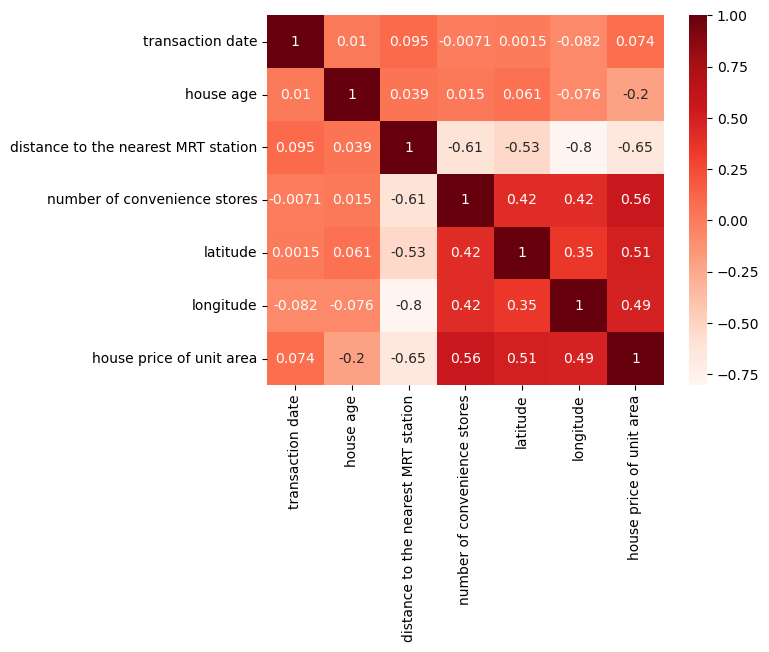

In [12]:
sns.heatmap(train_df.corr(), annot=True,cmap='Reds')

Text(0, 0.5, 'house price of unit area')

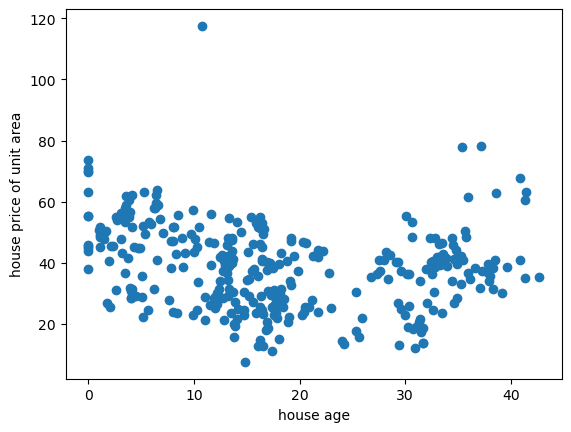

In [13]:
plt.scatter(train_df['house age'],train_df['house price of unit area'])
plt.xlabel("house age")
plt.ylabel("house price of unit area")

<Axes: xlabel='house age', ylabel='house price of unit area'>

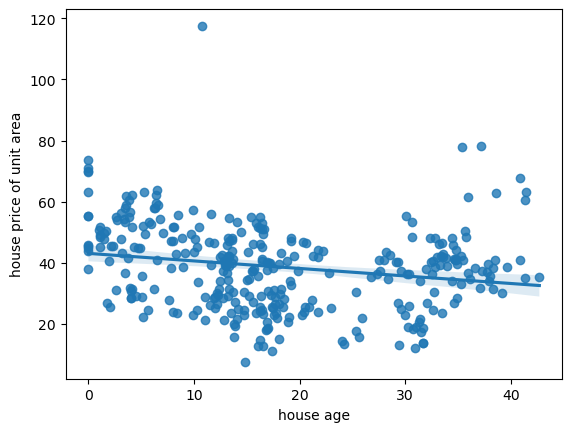

In [14]:
import seaborn as sns
sns.regplot(x="house age",y="house price of unit area",data=train_df)

#### The house age is not proportional to the price of unit area, but we can see a pattern and an obvious outlier.

Text(0, 0.5, 'house price of unit area')

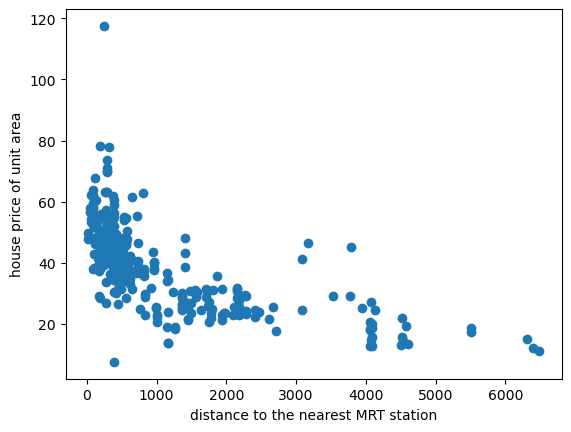

In [15]:
plt.scatter(train_df['distance to the nearest MRT station'],train_df['house price of unit area']) 
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')

<Axes: xlabel='distance to the nearest MRT station', ylabel='house price of unit area'>

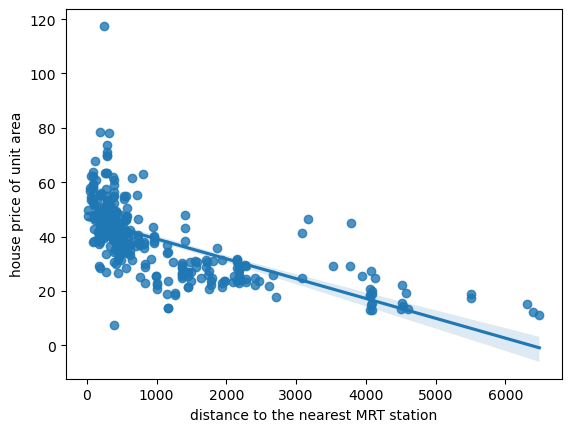

In [16]:
import seaborn as sns
sns.regplot(x="distance to the nearest MRT station",y="house price of unit area",data=train_df)

#### we can see that the closer the house is to the nearest MRT station, the heigher the price of unit area is.

<Axes: xlabel='number of convenience stores', ylabel='house price of unit area'>

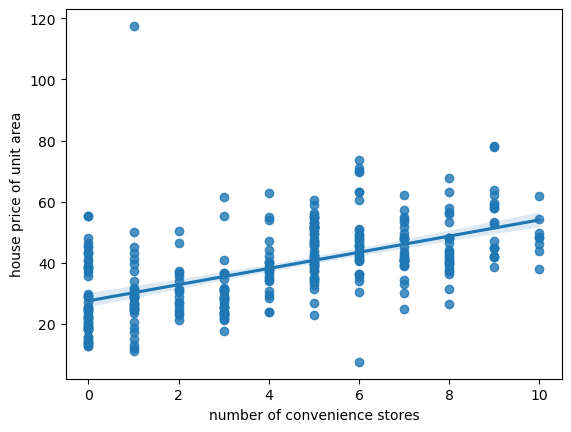

In [17]:
import seaborn as sns
sns.regplot(x="number of convenience stores",y="house price of unit area",data=train_df)

#### We can clearly see that the house price of unit area is proportional to the number of convenience stores. 
#### The more the number of convenience stores near the house, the the higher the price of the unit area.

<Axes: xlabel='latitude', ylabel='house price of unit area'>

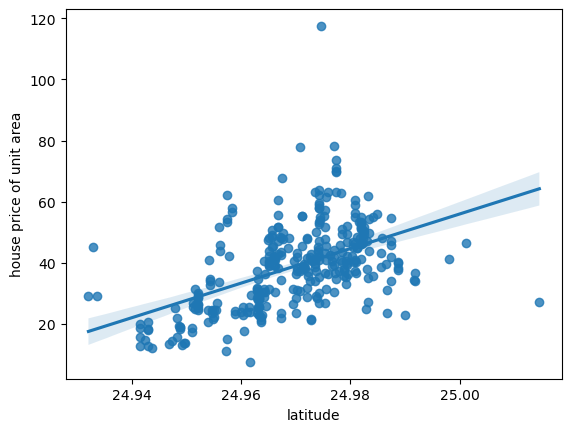

In [18]:
import seaborn as sns
sns.regplot(x="latitude",y="house price of unit area",data=train_df)

<Axes: xlabel='longitude', ylabel='house price of unit area'>

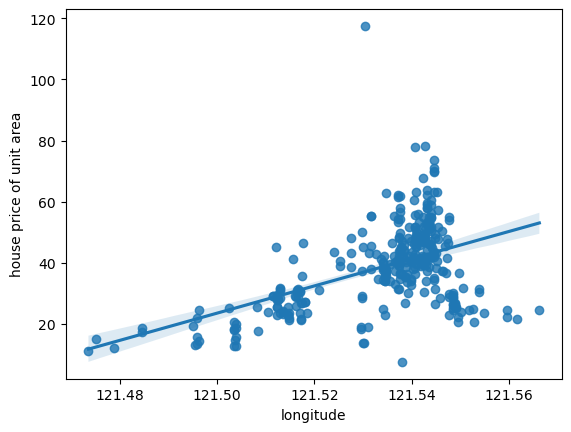

In [19]:
import seaborn as sns
sns.regplot(x="longitude",y="house price of unit area",data=train_df)

### Let's take a look at the outliers

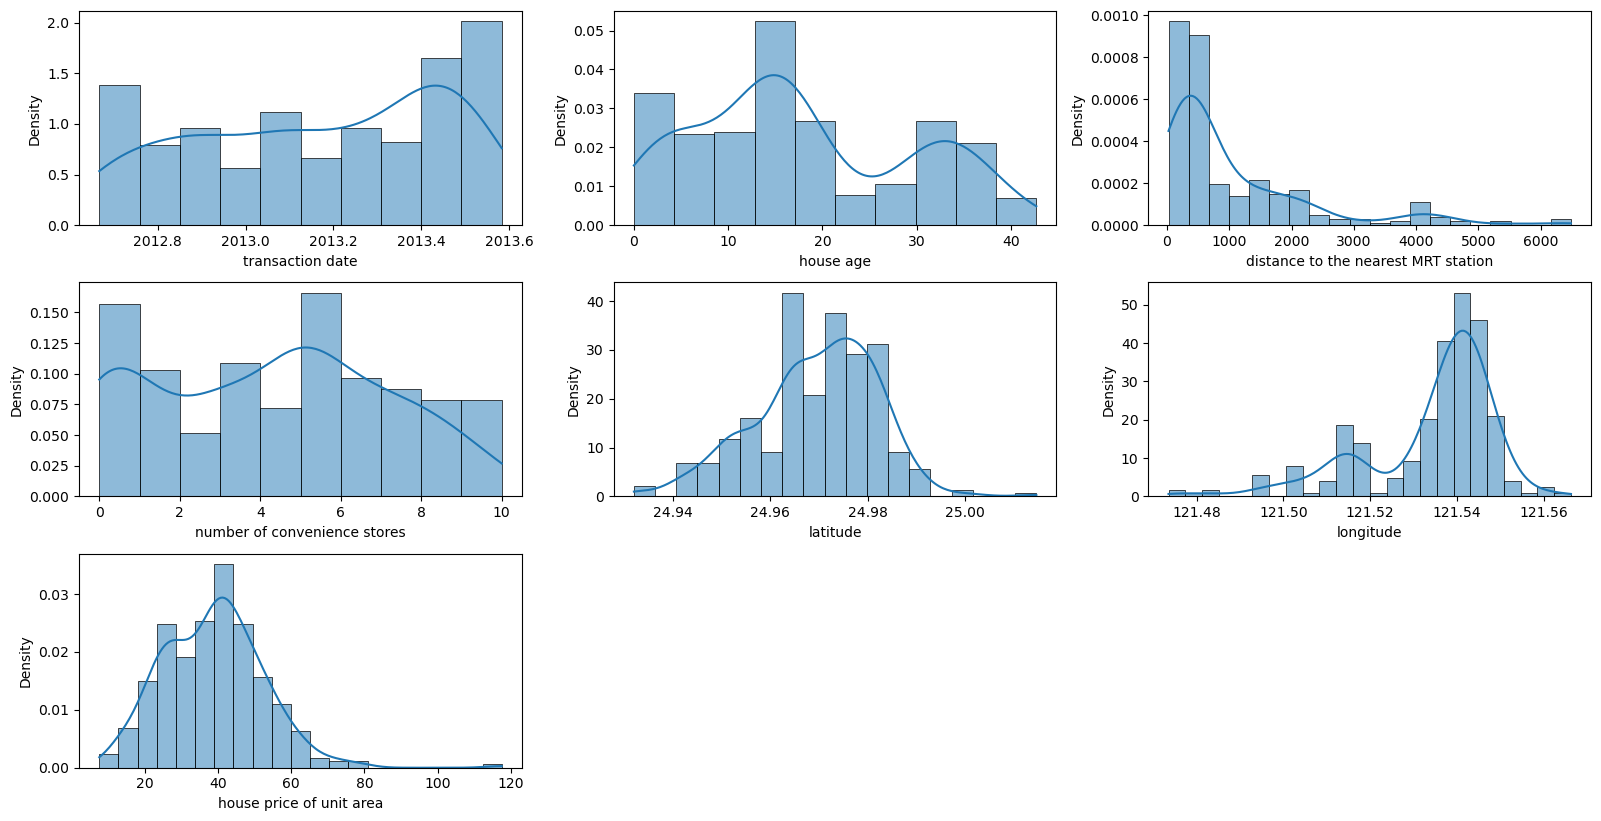

In [20]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_df.columns):
    plt.subplot(6,3,index+1)
    sns.histplot(train_df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

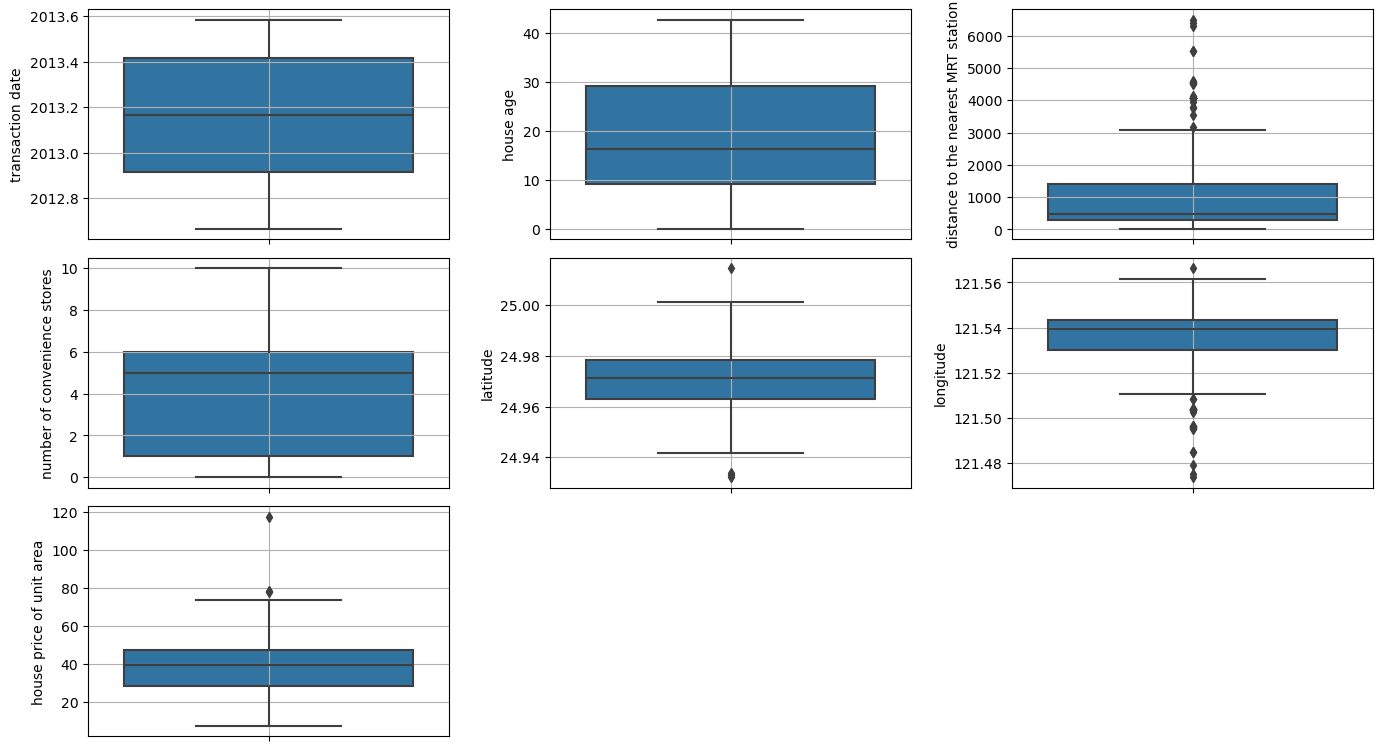

In [21]:
# Check outliers 
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_df):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col, data=train_df.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

We can see that there are obvious outliers in:
-  house price of unit area
-  longitude
- distance to the nearest MRT station

### Drop the outliers

In [20]:
train_df = train_df[train_df['house price of unit area']<80]
train_df = train_df[train_df['distance to the nearest MRT station']<3000]
train_df = train_df[train_df['longitude']>121.50]

#### After removing outliers

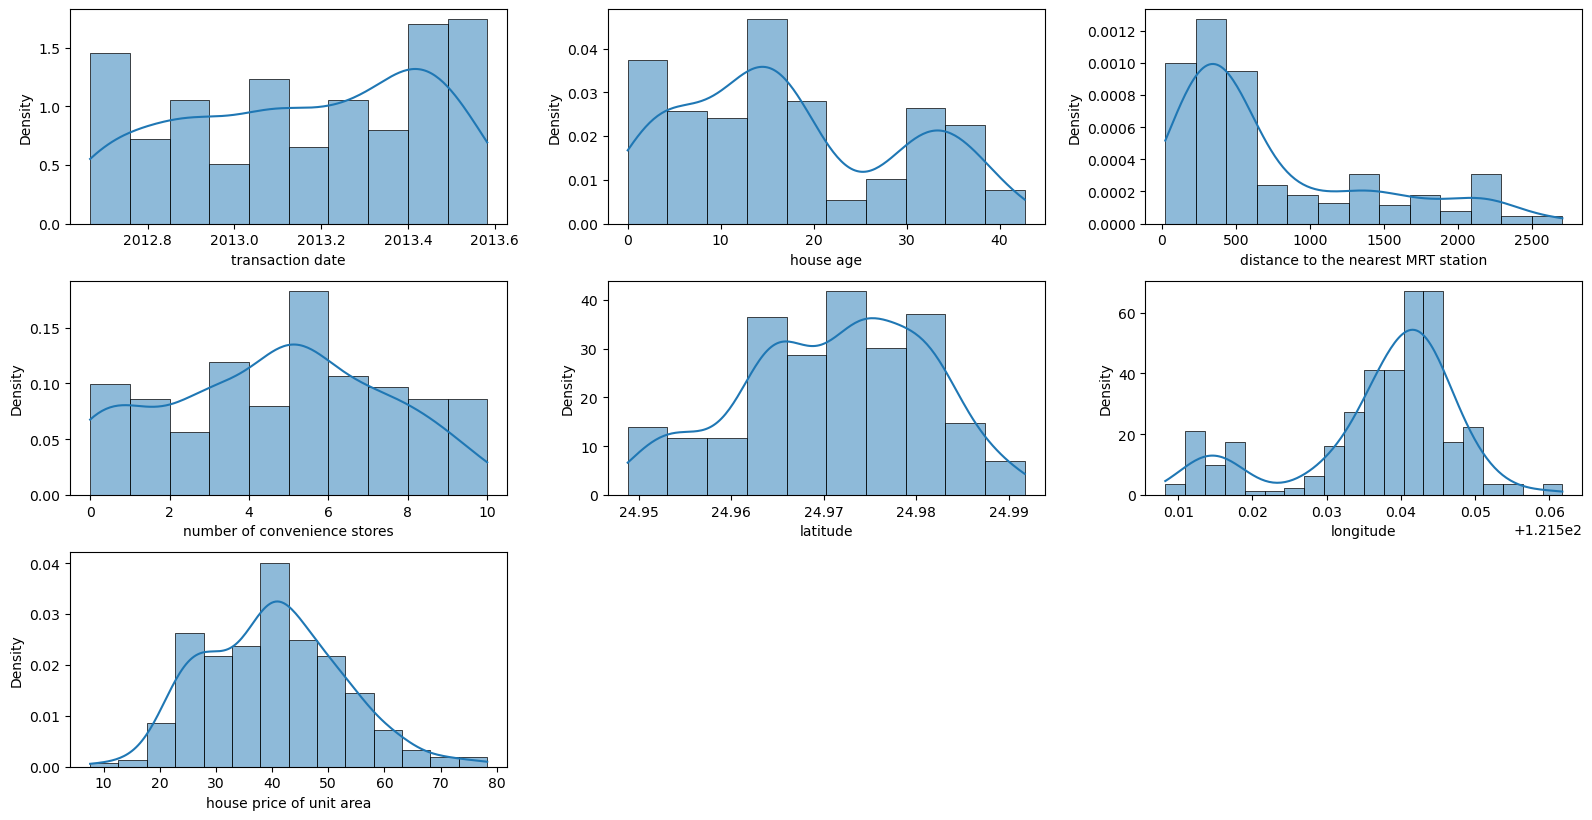

In [21]:
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_df.columns):
    plt.subplot(6,3,index+1)
    sns.histplot(train_df.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

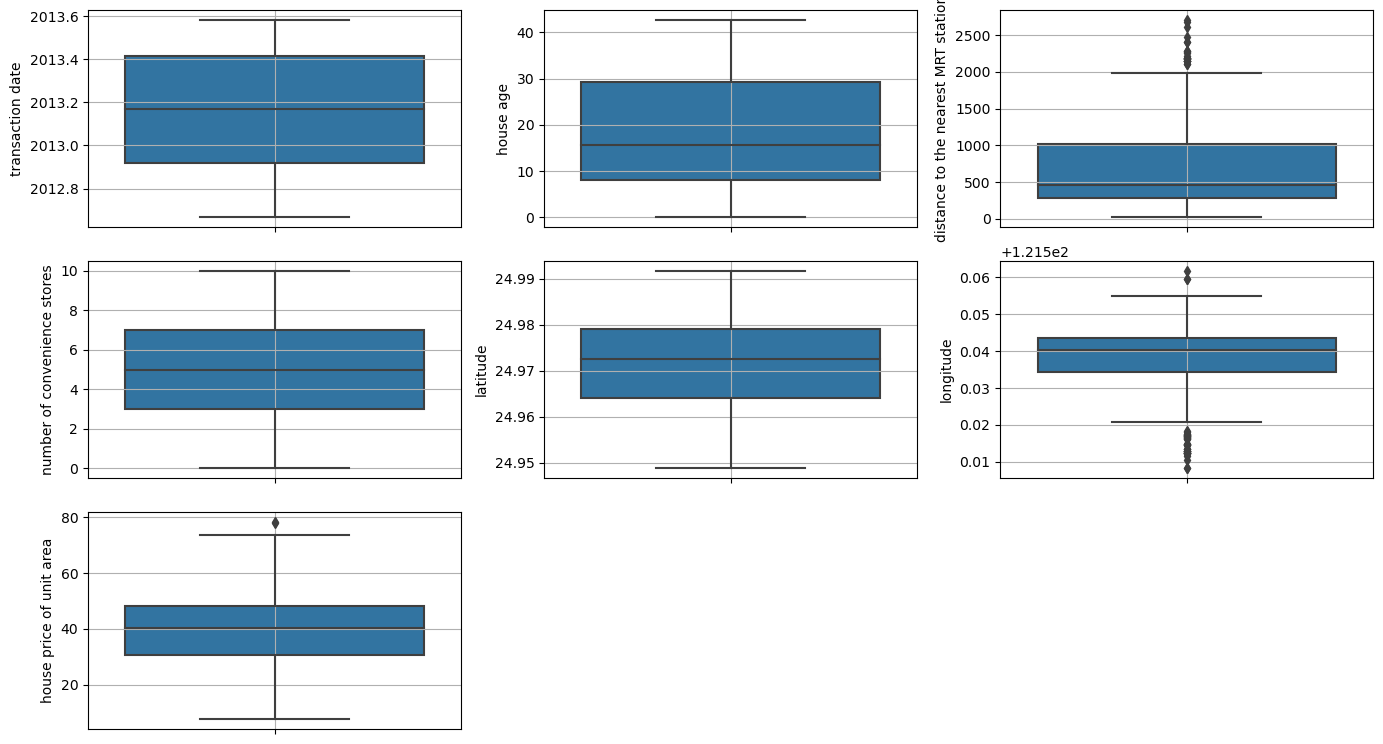

In [22]:
fig = plt.figure(figsize=(14,15))

for index,col in enumerate(train_df):
    plt.subplot(6,3,index+1)
    sns.boxplot(y=col,data=train_df.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

In [23]:
correlation = train_df.corr()
correlation[['house price of unit area']].sort_values(['house price of unit area'],ascending=False)

,house price of unit area
house price of unit area,1.000000
number of convenience stores,0.549931
latitude,0.442652
longitude,0.358851
transaction date,0.104169
house age,-0.197057
distance to the nearest MRT station,-0.684065


`The number of convenience stores is moderately correlated to the price of unit area, while the distance to the nearest MRT station negatively correlated.`

In [32]:
dfs= [train_df, test_df]
data = pd.concat(dfs)
data.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
159,2012.667,15.5,815.93140,4,24.97886,121.53464,37.4
95,2012.917,8.0,104.81010,5,24.96674,121.54067,51.8
11,2013.333,6.3,90.45606,9,24.97433,121.54310,58.1
374,2013.250,5.4,390.56840,5,24.97937,121.54245,49.5
165,2012.917,13.7,1236.56400,1,24.97694,121.55391,30.6


In [33]:
def to_date(data):
    # STEP 1: Convert transaction date to day, month and year columns
    # Create date column with `transaction date` as a date
    data['date'] = pd.to_datetime(data['transaction date'], format='%Y')

    # Create year column
    data['year'] = pd.DatetimeIndex(data['date']).year

    # Create month column by extracting the decimal part of `transaction date` and multiplying it by 12
    data['month'], data['year1'] = data['transaction date'].apply(lambda x: math.modf(x)).str
    data['month'] = data['month']*12

    # Create day column by extracting the decimal part of int
    data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str

    # Convert month to int
    data['month'] = (data['month']).astype(int)

    # Multiply `day` column by 30 + 1 to convert it to days
    data['day'] = (data['day']*30+1).astype(int)

    # Drop unnecessary columns
    data = data.drop(['transaction date', 'date', 'year1'], axis=1, inplace=True)


In [34]:
to_date(data)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16928\2772441778.py:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['month'], data['year1'] = data['transaction date'].apply(lambda x: math.modf(x)).str
C:\Users\rohit\AppData\Local\Temp\ipykernel_16928\2772441778.py:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['day'], data['month'] = data['month'].apply(lambda x: math.modf(x)).str


In [35]:
data

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month,day
159,15.5,815.93140,4,24.97886,121.53464,37.4,2012,8,1
95,8.0,104.81010,5,24.96674,121.54067,51.8,2012,11,1
11,6.3,90.45606,9,24.97433,121.54310,58.1,2013,3,30
374,5.4,390.56840,5,24.97937,121.54245,49.5,2013,3,1
165,13.7,1236.56400,1,24.97694,121.55391,30.6,2012,11,1
...,...,...,...,...,...,...,...,...,...
322,12.9,187.48230,1,24.97388,121.52981,33.1,2013,0,1
119,16.6,289.32480,5,24.98203,121.54348,59.6,2013,6,1
245,7.5,639.61980,5,24.97258,121.54814,40.8,2013,5,1
146,0.0,185.42960,0,24.97110,121.53170,52.2,2012,9,1


# Feature Scaling


The standard score of a sample x is calculated as:<br>
     `z = (x - u) / s`

In [44]:
# Spitting data into X,y
X=data.drop('house price of unit area',axis=1)
y=data['house price of unit area']

In [45]:
print('X=',X.shape, '\ny=',y.shape)

X= (414, 8) 
y= (414,)


In [46]:
X.head()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,year,month,day
159,15.5,815.93140,4,24.97886,121.53464,2012,8,1
95,8.0,104.81010,5,24.96674,121.54067,2012,11,1
11,6.3,90.45606,9,24.97433,121.54310,2013,3,30
374,5.4,390.56840,5,24.97937,121.54245,2013,3,1
165,13.7,1236.56400,1,24.97694,121.55391,2012,11,1


In [47]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_prep = scaler.transform(X)

### Polynomial Features

In [51]:
# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit_transform(X_prep)

poly_features

array([[-1.94447261e-01, -2.12563547e-01, -3.20199958e-02, ...,
         6.90104420e-01, -5.58894492e-01,  4.52631579e-01],
       [-8.53572528e-01, -7.76683893e-01,  3.07884575e-01, ...,
         2.88483526e+00, -1.14270186e+00,  4.52631579e-01],
       [-1.00297426e+00, -7.88070707e-01,  1.66750286e+00, ...,
         3.78881078e-01, -9.14911387e-01,  2.20930233e+00],
       ...,
       [-8.97514213e-01, -3.52428519e-01,  3.07884575e-01, ...,
         1.37120642e-03,  2.49128747e-02,  4.52631579e-01],
       [-1.55663948e+00, -7.12729825e-01, -1.39163828e+00, ...,
         1.25434830e+00, -7.53496947e-01,  4.52631579e-01],
       [ 1.33472336e+00, -7.90572594e-01,  2.00740743e+00, ...,
         6.90104420e-01, -5.58894492e-01,  4.52631579e-01]])

In [52]:
poly_features.shape

(414, 44)

# Data spliting for Model into X and y

In [53]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

- Training Set (X_train, y_train): Used to train your machine learning model.
- Validation Set (X_val, y_val): Used to evaluate the model's performance during training, tune hyperparameters, and prevent overfitting also used during model development for hyperparameter tuning, model selection, and performance evaluation.
- Test Set (X_test, y_test): Used to evaluate the final model performance after all model tuning and training on the training and validation sets.

# Polynomial Regression

#### Why Use Polynomial Features with LinearRegression?
1. Capturing Non-linear Relationships: Real-world data often exhibit non-linear relationships between features and the target variable. Using polynomial features allows the model to capture these non-linearities better than a purely linear model.

2. Improving Model Fit: By introducing polynomial features, the model can fit more complex patterns in the data, potentially leading to better performance and higher predictive accuracy.

3. Flexibility in Model Complexity: The degree of the polynomial (e.g., degree=2, degree=3) can be chosen based on the complexity of the underlying relationship in the data. Higher degrees capture more intricate patterns but also risk overfitting if not properly regularized.

In [57]:
# Fit the model
from sklearn.preprocessing import PolynomialFeatures

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [58]:
# Predict on train data
pred_train_poly = model_poly.predict(X_train)

In [59]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_train_poly = r2_score(y_train, pred_train_poly)
mse_train_poly = mean_squared_error(y_train, pred_train_poly)
rmse_train_poly = np.sqrt(mse_train_poly)
mae_train_poly = mean_absolute_error(y_train, pred_train_poly)

In [60]:
# Predict on validation data
pred_val_poly = model_poly.predict(X_val)

r2_val_poly = r2_score(y_val, pred_val_poly)
mse_val_poly = mean_squared_error(y_val, pred_val_poly)
rmse_val_poly = np.sqrt(mse_val_poly)
mae_val_poly = mean_absolute_error(y_val, pred_val_poly)

In [61]:
# DataFrame for comparison
pd.DataFrame({'Validation':  [r2_val_poly, mse_val_poly, rmse_val_poly, mae_val_poly],
               'Training': [r2_train_poly, mse_train_poly, rmse_train_poly, mae_train_poly],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.644157,0.699484
MSE,58.557779,60.993802
RMSE,7.652305,7.809853
MAE,5.986287,5.050555


In [63]:
# Finally, predict on test data
pred_test_poly = model_poly.predict(X_test)

r2_test_poly = r2_score(y_test, pred_test_poly)
mse_test_poly = mean_squared_error(y_test, pred_test_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
mae_test_poly = mean_absolute_error(y_test, pred_test_poly)

print('R2 Score: ', r2_test_poly)
print('MSE: ', mse_test_poly)
print('RMSE: ', rmse_test_poly)
print('MAE: ', mae_test_poly)

R2 Score:  0.7357406567534741
MSE:  39.1779018490573
RMSE:  6.25922533937366
MAE:  4.736519907756024


In [66]:
residuals = y_test-pred_test_poly
residuals.head()

191    1.552930
343    7.139063
275   -6.982129
234   -1.309961
208    6.046191
Name: house price of unit area, dtype: float64

Differences between actual (Y_Test) and predicted (Y_Pred) values. Positive residuals indicate the model underpredicted, while negative residuals indicate overprediction.

##### Residual Plot

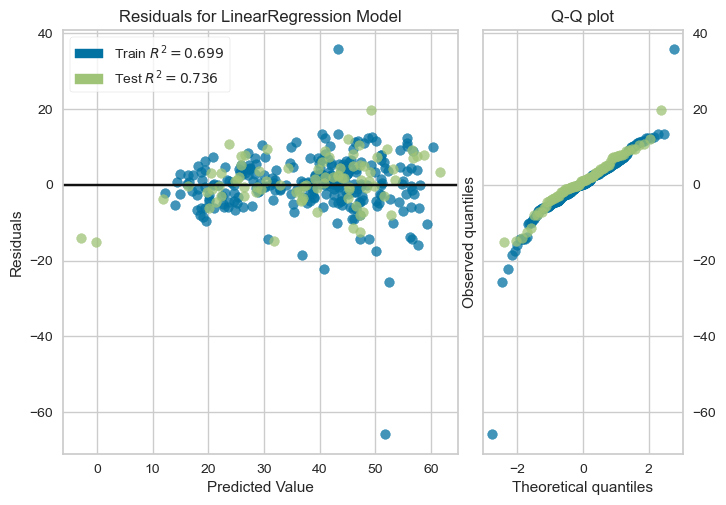

In [69]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model_poly, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [70]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly, 'Residuals':(y_test-pred_test_poly) }).head(5)

,Y_Test,Y_Pred,Residuals
191,37.8,36.247070,1.552930
343,46.6,39.460938,7.139063
275,49.7,56.682129,-6.982129
234,23.9,25.209961,-1.309961
208,26.2,20.153809,6.046191


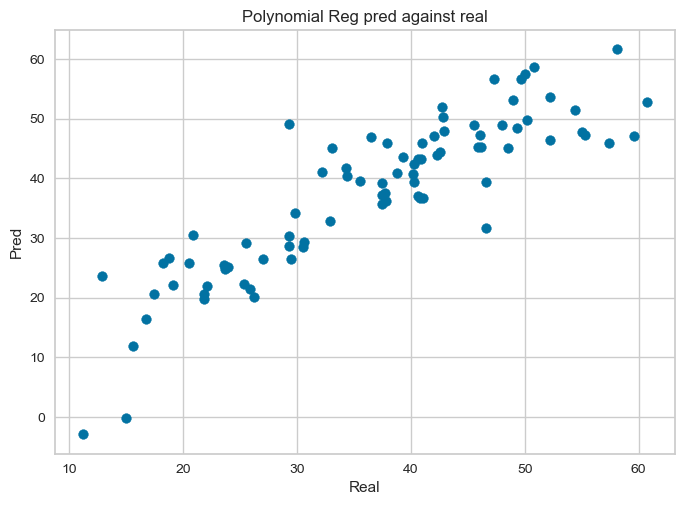

In [71]:
plt.scatter(y_test, pred_test_poly)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Polynomial Reg pred against real')
plt.show()

# L2 Regularization - Ridge Regression

In [101]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [102]:
# Predict on train data
pred_train_ridge = model_ridge.predict(X_train)

r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [103]:
# Predict on validation data
pred_val_ridge = model_ridge.predict(X_val)

r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [104]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.647618,0.692204
MSE,57.988180,62.471410
RMSE,7.614997,7.903886
MAE,5.941518,5.117418


- The model performs similarly on both the training and validation data, with only a slight difference between the metrics, indicating minimal overfitting.<br>
- The validation R² is slightly lower than the training R², but this is expected and suggests the model generalizes reasonably well to unseen data.<br>
- MSE, RMSE, and MAE are all close between training and validation, further supporting that the model is well-tuned.

In [107]:
# Cross-validation method to evaluate model
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01), scoring='neg_mean_absolute_error')

In [108]:
model_ridge_cv.fit(X_train, y_train)

print("alpha: ", model_ridge_cv.alpha_)

alpha:  0.01


In [109]:
# Predict on validation data
pred_val_ridge = model_ridge_cv.predict(X_val)

r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [110]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val, mse_val, rmse_val, mae_val],
               'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.647618,0.644401
MSE,57.988180,58.517591
RMSE,7.614997,7.614997
MAE,5.941518,5.982271


The model shows consistent performance across both validation sets with very close R², MSE, RMSE, and MAE values. This indicates that the Ridge regression model generalizes well across different subsets of the data, maintaining similar predictive accuracy. The minimal differences between Validation 1 and Validation 2 suggest that the model is robust and not overly sensitive to different data splits.

In [111]:
# Finally, predict on test data
pred_test_ridge = model_ridge_cv.predict(X_test)

r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print('R2 Score: ', r2_test_ridge)
print('MSE: ', mse_test_ridge)
print('RMSE: ', rmse_test_ridge)
print('MAE: ', mae_test_ridge)

R2 Score:  0.7361210188906726
MSE:  39.12151106909399
RMSE:  7.61499705055743
MAE:  4.732911889649483


Residual Plot

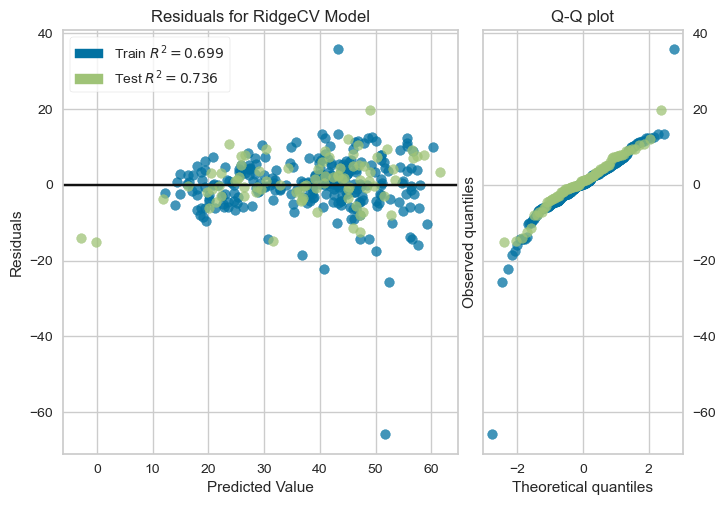

In [112]:
visualizer = ResidualsPlot(model_ridge_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [113]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly, 'Residuals':(y_test-pred_test_ridge) }).head(5)

,Y_Test,Y_Pred,Residuals
191,37.8,36.247070,1.568181
343,46.6,39.460938,7.151469
275,49.7,56.682129,-6.962921
234,23.9,25.209961,-1.301097
208,26.2,20.153809,6.072024


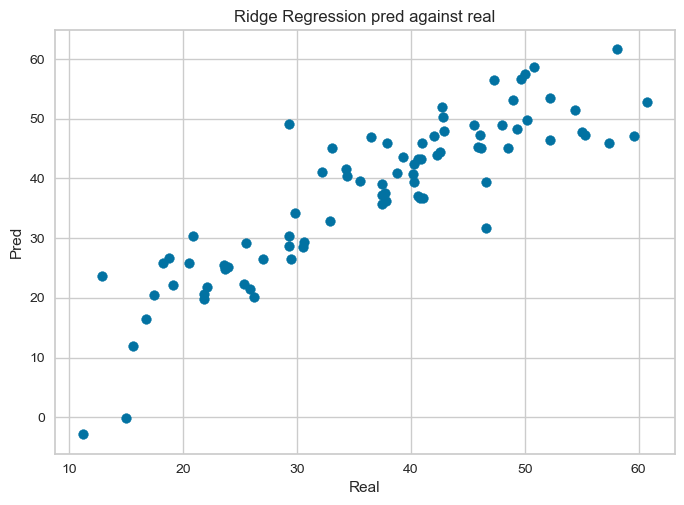

In [114]:
plt.scatter(y_test, pred_test_ridge)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Ridge Regression pred against real')
plt.show()


# L1 Regularization - Lasso Regression

In [73]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [88]:
# Predict on train data
pred_train_lasso = model_lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, pred_train_lasso)

mse_train_lasso = mean_squared_error(y_train,pred_train_lasso)

rmse_train_lasso = np.sqrt(mse_train_lasso)

mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [89]:
# Predict on validation data

pred_val_lasso = model_lasso.predict(X_val)
r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val,pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val_lasso)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [90]:
pd.DataFrame({'Validation':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Training': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.663156,0.692011
MSE,55.431238,62.510587
RMSE,7.445216,7.906364
MAE,5.863333,5.046150


In [91]:
# Cross-validation method to evaluate model
#model_lasso_cv = LassoCV(eps=0.01, n_alphas=50000, cv=10)
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [92]:
model_lasso_cv.fit(X_train, y_train)

print("alpha: ", model_lasso_cv.alpha_)

alpha:  0.25538930702414975


In [94]:
# Predict on validation data after Cross-validation
pred_val_lasso2 = model_lasso_cv.predict(X_val)

r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val2_lasso)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [95]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Validation 2': [r2_val2_lasso, mse_val2_lasso, rmse_val2_lasso, mae_val2_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation 1,Validation 2
R2,0.663156,0.663715
MSE,55.431238,55.339244
RMSE,7.445216,7.439035
MAE,5.863333,5.800068


#### Not much of a difference

In [97]:
# Finally, predict on test data
pred_test_lasso = model_lasso_cv.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val_lasso)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)

print('R2 Score: ', r2_test_lasso)
print('MSE: ', mse_test_lasso)
print('RMSE: ', rmse_test_lasso)
print('MAE: ', mae_test_lasso)

R2 Score:  0.8024311344762953
MSE:  29.29067153056683
RMSE:  7.445215810787363
MAE:  4.104017154631385


Residual Plot

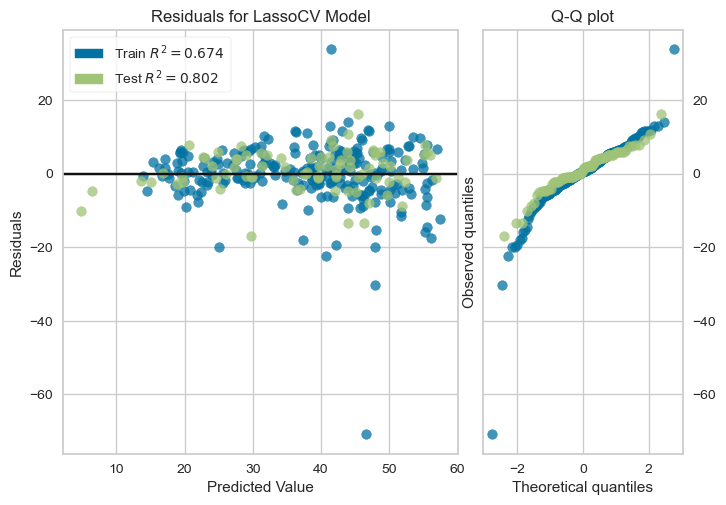

In [98]:
visualizer = ResidualsPlot(model_lasso_cv, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [99]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':pred_test_poly, 'Residuals':(y_test-pred_test_lasso) }).head(5)

,Y_Test,Y_Pred,Residuals
191,37.8,36.247070,0.001543
343,46.6,39.460938,4.622188
275,49.7,56.682129,-5.777495
234,23.9,25.209961,-5.116203
208,26.2,20.153809,0.145639


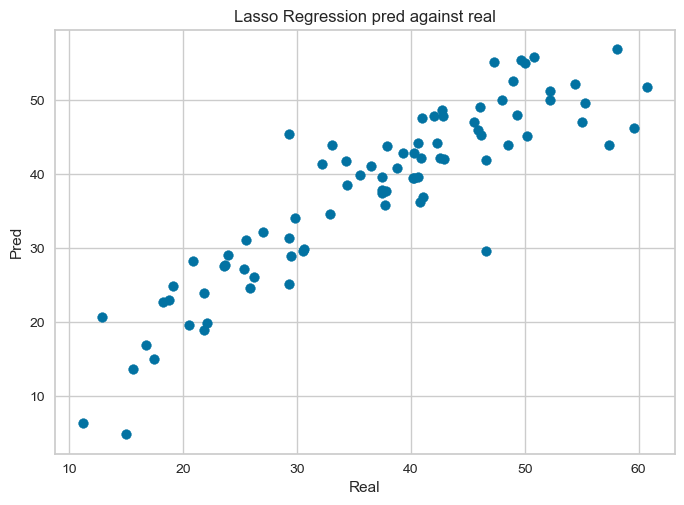

In [100]:
plt.scatter(y_test, pred_test_lasso)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('Lasso Regression pred against real')
plt.show()

# XGBRegressor

In [117]:
# Fit the model
#!pip install xgboost -q

from xgboost import XGBRegressor 
import xgboost as xgb
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
# Predict on train data
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [123]:
# Predict on validation data
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [126]:
pd.DataFrame({'Validation':  [r2_val_xgbr, mse_val_xgbr, rmse_val_xgbr, mae_val_xgbr],
               'Training': [r2_train_xgbr, mse_train_xgbr, rmse_train_xgbr, mae_train_xgbr],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

,Validation,Training
R2,0.731623,0.878817
MSE,44.164240,24.595702
RMSE,6.645618,4.959405
MAE,5.077485,3.508754


In [127]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

print('R2 Score: ', r2_test_xgbr)
print('MSE: ', mse_test_xgbr)
print('RMSE: ', rmse_test_xgbr)
print('MAE: ', mae_test_xgbr)

R2 Score:  0.7267393912347608
MSE:  40.51238899595248
RMSE:  6.364934327701463
MAE:  4.699175078610341


In [128]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

print('R2 Score: ', r2_test_xgbr)
print('MSE: ', mse_test_xgbr)
print('RMSE: ', rmse_test_xgbr)
print('MAE: ', mae_test_xgbr)

R2 Score:  0.7267393912347608
MSE:  40.51238899595248
RMSE:  6.364934327701463
MAE:  4.699175078610341


Residual Plot

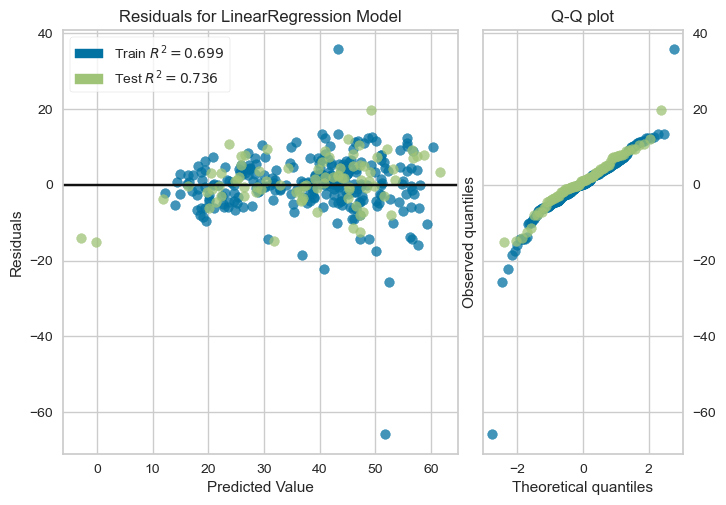

In [129]:
visualizer = ResidualsPlot(model_poly, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [132]:
pd.DataFrame({'Y_Test':y_test,'Y_pred':pred_test_xgbr,
        'XGBR Residuals':(y_test-pred_test_xgbr)}).head()

,Y_Test,Y_pred,XGBR Residuals
191,37.8,39.701622,-1.901622
343,46.6,40.525177,6.074823
275,49.7,50.829876,-1.129876
234,23.9,28.005476,-4.105476
208,26.2,27.733267,-1.533267


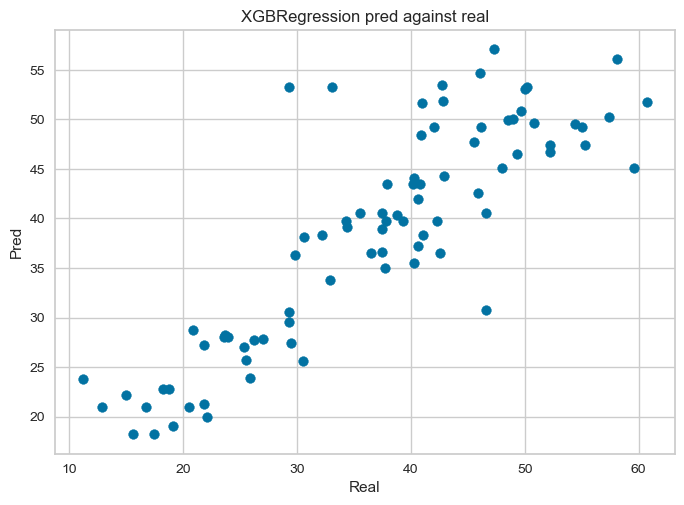

In [133]:
plt.scatter(y_test, pred_test_xgbr)
plt.xlabel('Real')
plt.ylabel('Pred')
plt.title('XGBRegression pred against real')
plt.show()

**Regression Evaluation Metrics**

Here are three common evaluation metrics for regression problems:

- **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

- **Mean Squared Error (MSE)** is the mean of the squared errors:
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 } $$

📌 **Comparing these metrics:**

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "penalizes" larger errors, which tends to be useful in the real world.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

# R square and adjusted R square

Formula

$$
R^2 = 1 - \frac{SSR}{SST}
$$

$R^2$ = coefficient of determination<br> $SSR$ = sum of squares of residuals<br> $SST$ = total sum of squares

In [135]:
#eg. for exb calculation
from sklearn.metrics import r2_score
score=r2_score(y_test,pred_test_xgbr)
print(score)

0.7267393912347608


$$
\text{Adjusted } R^2 = 1 - \left[\frac{(1-R^2)(n-1)}{n-k-1}\right]
$$

where:

$R2$: The R2 of the model<br> $n$: The number of observations<br> $k$: The number of predictor variables

In [137]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.41033237055922067

# Calculation

R2 Score of the models

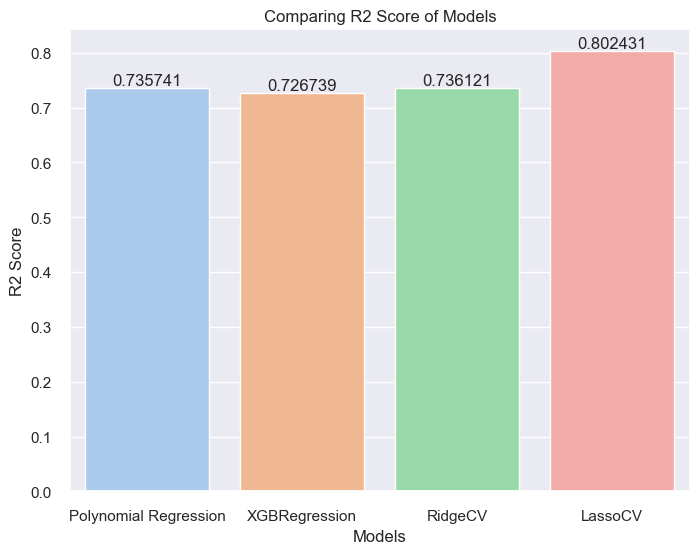

In [140]:
sns.set()
plt.figure(figsize=(8,6))

models = ['Polynomial Regression', 'XGBRegression', 'RidgeCV', 'LassoCV']
r2 = [r2_test_poly, r2_test_xgbr, r2_test_ridge, r2_test_lasso]
ax = sns.barplot(x = models, y = r2, palette='pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models');


RMSE of the models

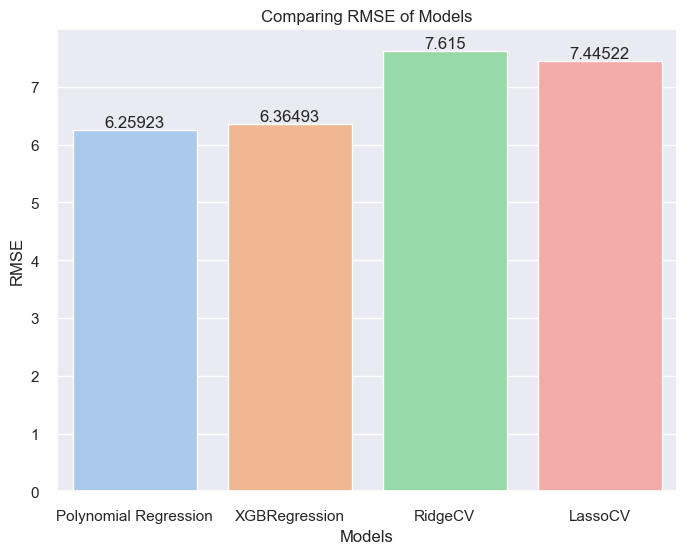

In [145]:
sns.set()
plt.figure(figsize=(8,6))
rmse = [rmse_test_poly, rmse_test_xgbr, rmse_test_ridge, rmse_test_lasso]
ax = sns.barplot(x = models, y = rmse, palette = 'pastel')
ax.bar_label(ax.containers[0])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');

We can see that the here XGBRegression Model performs the best
- R2 Score: 0.780957
 - RMSE: 6.09142